In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
chessdata = pd.read_csv('200k_blitz_rapid_classical_bullet.csv')
chessdata.head()

C:\Users\rinoa\AppData\Local\Temp\ipykernel_26940\2600965731.py:1: DtypeWarning: Columns (19,20,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,243,244,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620) have mixed types. Specify dtype option on import or set low_memory=False.
  chessdata = pd.read_csv('200k_blitz_rapid_classical_bullet.csv')


,Index,Index.1,Black,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,...,Clock_ply_193,Clock_ply_194,Clock_ply_195,Clock_ply_196,Clock_ply_197,Clock_ply_198,Clock_ply_199,Clock_ply_200,Category,Weekday
0,0,124,albertoPlasta,906,13.0,2019.04.30,B15,Rated Blitz game,Caro-Kann Defense,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday
1,1,494,Luckystriker,1296,28.0,2019.04.30,C50,Rated Blitz game,Italian Game,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday
2,2,552,Verascardoso,1761,-13.0,2019.04.30,C41,Rated Rapid game,Philidor Defense #2,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rapid,Tuesday
3,3,588,Stockfish94,2404,8.0,2019.04.30,B06,Rated Bullet game,Modern Defense,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bullet,Tuesday
4,4,725,deneme12376,1595,-10.0,2019.04.30,B32,Rated Blitz game,Sicilian Defense: Loewenthal Variation,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday


In [3]:
chessdata[['Opening']].describe()

,Opening
count,200000
unique,2357
top,Queen's Pawn Game: Mason Attack
freq,3467


#### Notice the number of unique chess opennings, 2357, certainly far too many to plot on a graph or perform analyses on. Thankfully, examining the data reveals that many of the unique opennings are variants of a general moveset, ie, the Queen's Pawn Game, Mason Attack, the most frequent game in the dataset, as well as many others, is but a variant of the Queen's Pawn Game. So with pandas, we can truncate the back part of the strings in the opening column, so pandas will recognise the variants as part of a more general umbrella term for an openning.

---
#### Admittedly, this method is not foolproof as there are various subtlities associated with the opennings. Queen's Pawn Games start with white advancing the queen's pawn by 2 spaces(the second most popular first move), which then develop into various opennings. Technically, all games starting with this are Queen's Pawn Games, but that does not help much as it only conveys information about the very first move, hence, the other names, Queen's Gambit Declined/Accepted, Queen's Indian, etc. This leaves those less established Queen's Pawn Games, labeled the more generic name.

In [4]:
chessdata['Opening_new'] = chessdata['Opening'].str.split(':').str[0]
chessdata['Opening_new'] = chessdata['Opening_new'].str.split('#').str[0]
chessdata['Opening_new'] = chessdata['Opening_new'].str.split(',').str[0]
#chessdata['Opening_new'] = chessdata['Opening_new'].str.split('.').str[0]
chessdata['Opening_new'] = chessdata['Opening_new'].str.split().str[:3].str.join(sep = ' ')


In [5]:
s = chessdata
s['freq'] = s.groupby('Opening_new')['Opening_new'].transform('count')

# s = s[['Opening_new', 'freq']]

# s['Opening_new'] = s['Opening_new'].drop_duplicates()
# s = s.dropna()
s = s[s['freq'] >100]
s

,Index,Index.1,Black,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,...,Clock_ply_195,Clock_ply_196,Clock_ply_197,Clock_ply_198,Clock_ply_199,Clock_ply_200,Category,Weekday,Opening_new,freq
0,0,124,albertoPlasta,906,13.0,2019.04.30,B15,Rated Blitz game,Caro-Kann Defense,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday,Caro-Kann Defense,6878
1,1,494,Luckystriker,1296,28.0,2019.04.30,C50,Rated Blitz game,Italian Game,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday,Italian Game,8617
2,2,552,Verascardoso,1761,-13.0,2019.04.30,C41,Rated Rapid game,Philidor Defense #2,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,Rapid,Tuesday,Philidor Defense,5391
3,3,588,Stockfish94,2404,8.0,2019.04.30,B06,Rated Bullet game,Modern Defense,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,Bullet,Tuesday,Modern Defense,3666
4,4,725,deneme12376,1595,-10.0,2019.04.30,B32,Rated Blitz game,Sicilian Defense: Loewenthal Variation,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Tuesday,Sicilian Defense,27238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,23925,Farook38,1491,10.0,2019.05.22,B00,Rated Rapid game,"Nimzowitsch Defense: Kennedy Variation, Linkss...",0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,Rapid,Wednesday,Nimzowitsch Defense,2364
199996,199996,24136,dauntezz,1549,-10.0,2019.05.22,C21,Rated Classical game,King's Pawn Game: Beyer Gambit,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,Classical,Wednesday,King's Pawn Game,6903
199997,199997,24146,alexi_prieto,1450,-11.0,2019.05.22,D20,Rated Blitz game,Queen's Gambit Accepted,1-0,...,NaN,NaN,NaN,NaN,NaN,NaN,Blitz,Wednesday,Queen's Gambit Accepted,2590
199998,199998,24219,Stradivari2,1588,40.0,2019.05.22,B07,Rated UltraBullet tournament https://lichess.o...,Pirc Defense #5,0-1,...,NaN,NaN,NaN,NaN,NaN,NaN,Bullet,Wednesday,Pirc Defense,2814


#### We truncate the Openning colomn at the first 3 words, removing the data after a ':' or '#' or ',', to simplify the data and now, we have reduced the complexity 10 fold, only about 200 chess openings remain, small enough to plot, to see what we are dealling with. We also removed opennings with less than 100 games plays as there will not be enough data to say anuthing conclusive about them.

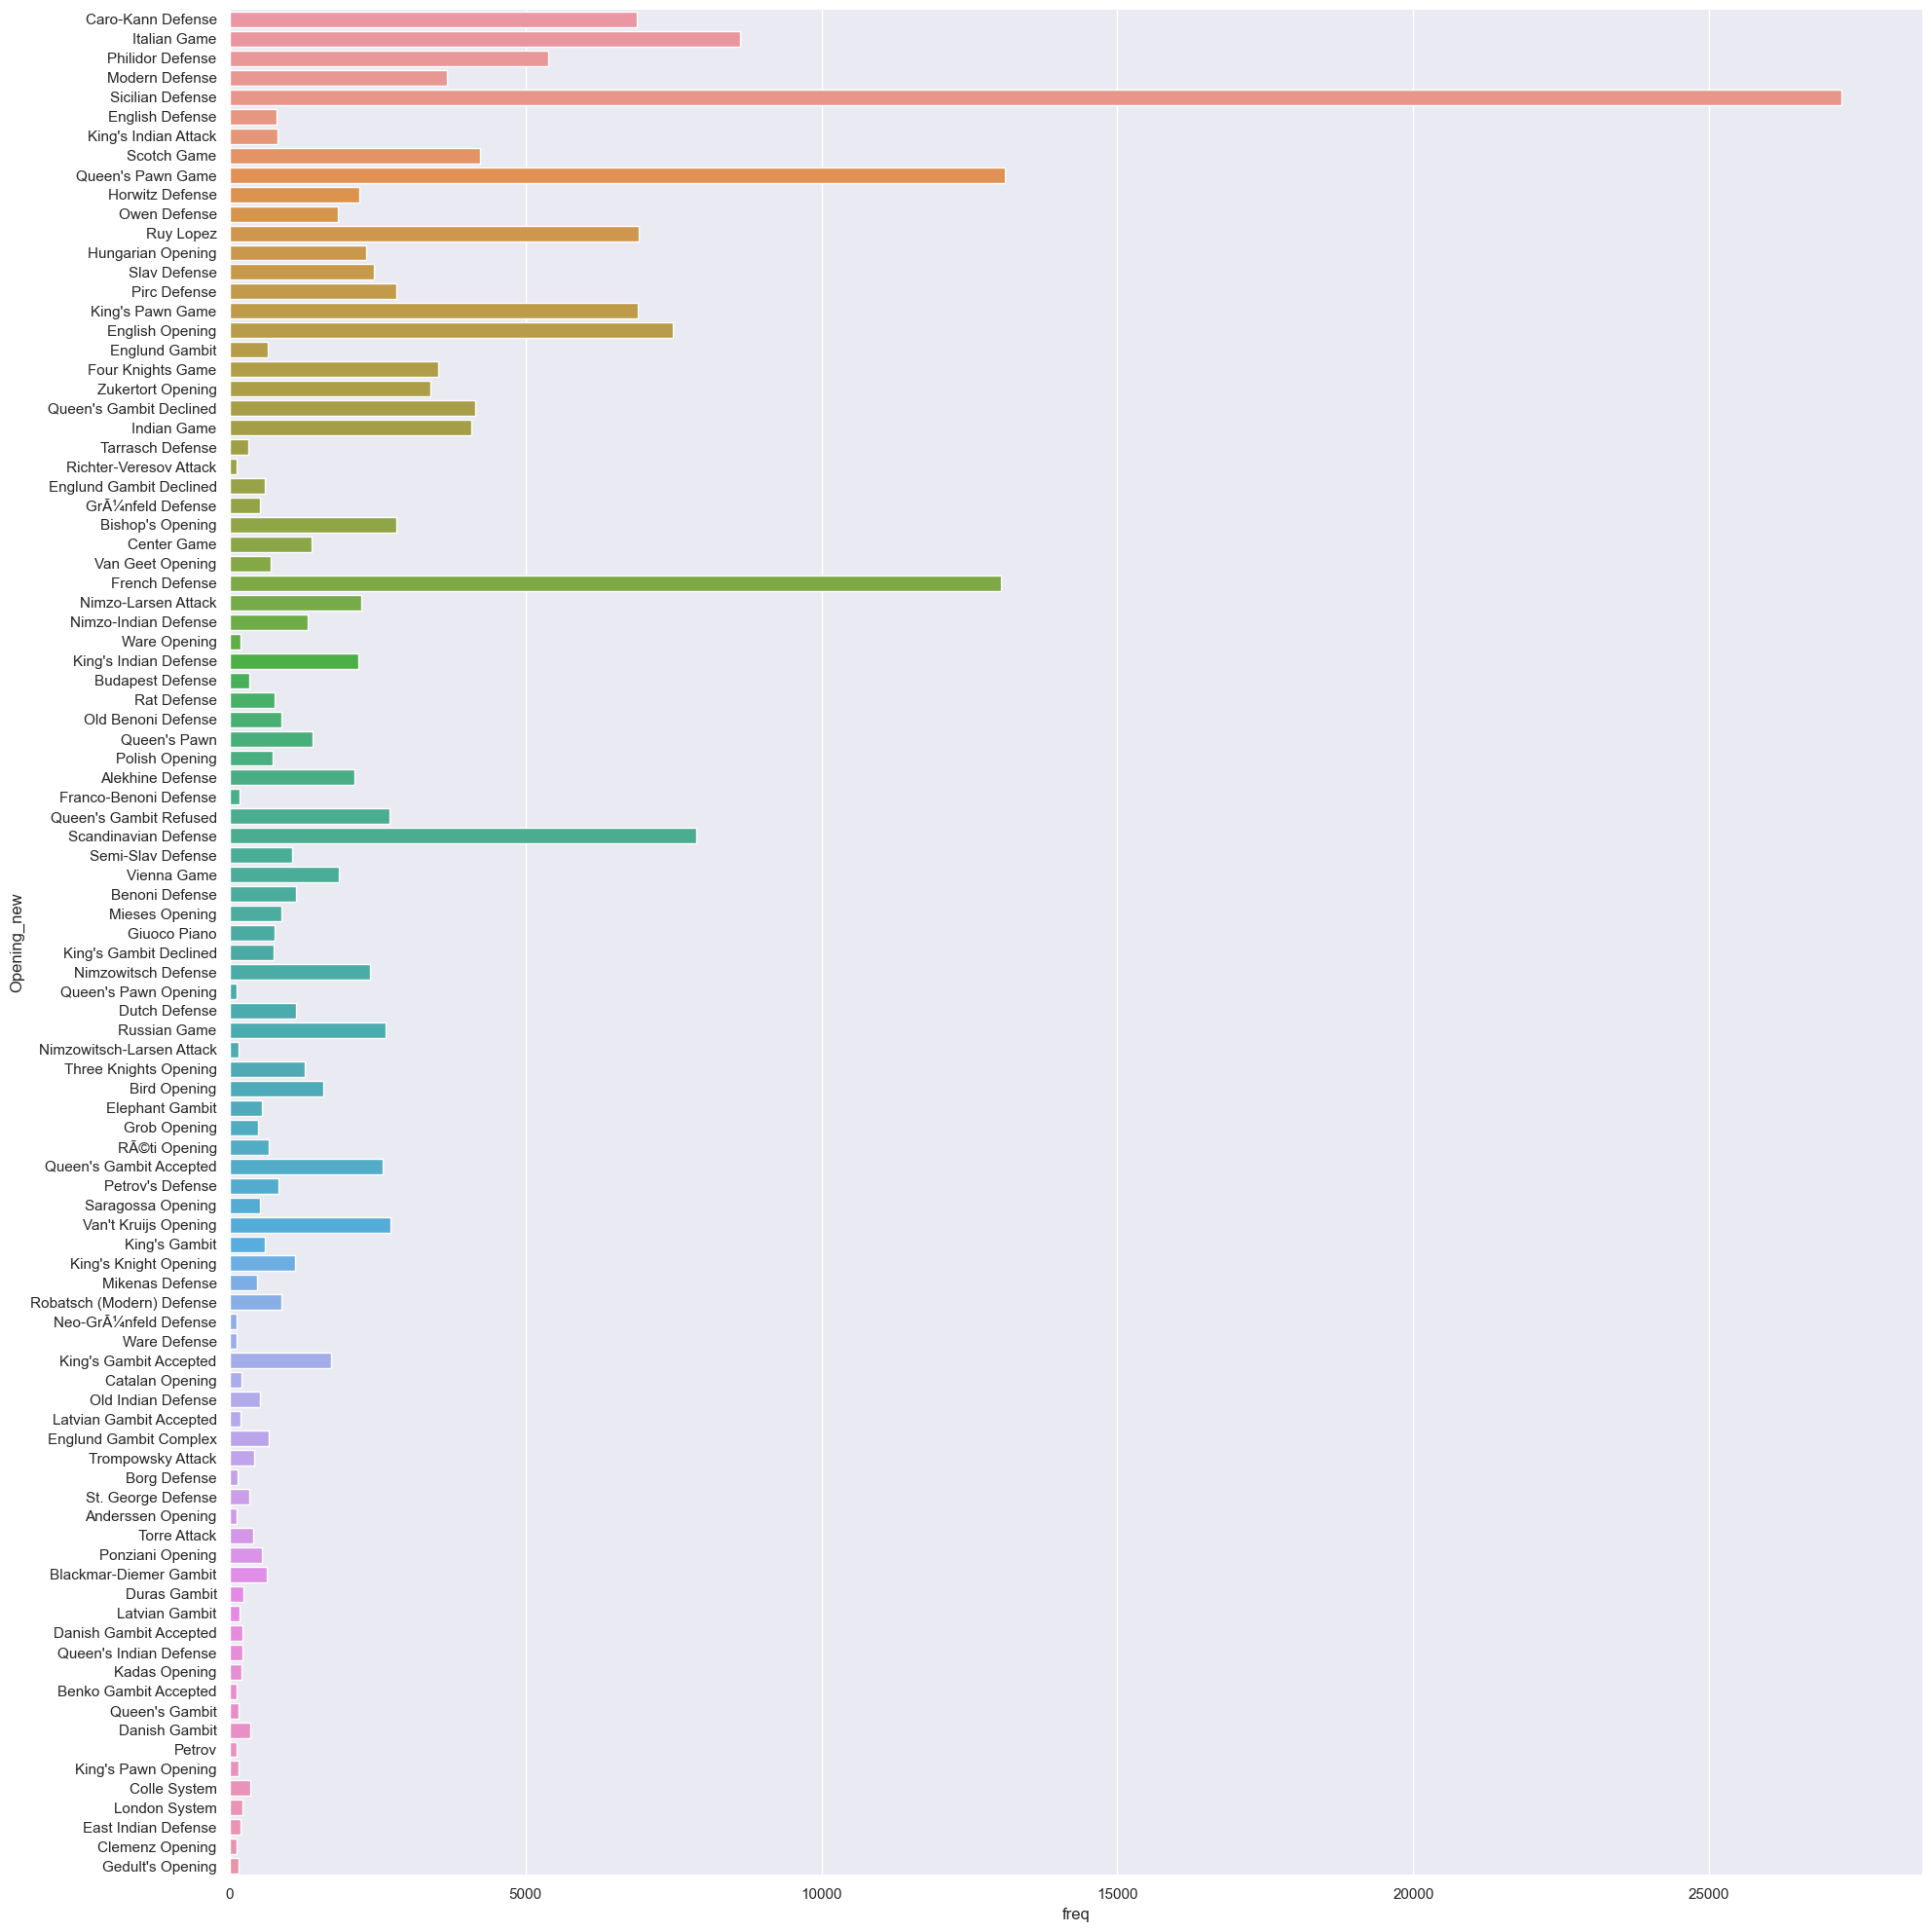

In [6]:
sb.catplot(x= 'freq', y='Opening_new', data = s, kind='bar',orient='h', height=20, aspect=1)

#### Now that we can visualise what we are dealing with, we notice that some categories, that should refer to the same openning being in different categories. ie. Queen's Gambit Declined and Queen's Gambit Refused both refer to the same starting move set, but are in different columns. Notably, the slav and Semi-Slav Defences are also a variant of the Queen's Gambit Declined games but enough games have been played in that style that it is recognised as its own category. So we manually merge the columns that refer to the same openning.

chessdata[['Openning']].describe()

In [7]:
s.loc[s.Opening_new == "Queen's Gambit Refused", 'Opening_new'] = "Queen's Gambit Declined"
s.loc[s.Opening_new == "Queen's Pawn Opening", 'Opening_new'] = "Queen's Pawn Game"
s.loc[s.Opening_new == "King's Pawn Opening", 'Opening_new'] = "King's Pawn Game"
s.loc[s.Opening_new == "Queen's Pawn", 'Opening_new'] = "Queen's Pawn Game"
s.loc[s.Opening_new == "Petrov", 'Opening_new'] = "Petrov Defense"
s.loc[s.Opening_new == "Petrov's Defense", 'Opening_new'] = "Petrov Defense"
s.loc[s.Opening_new == "Ware Opening", 'Opening_new'] = "Ware Defense"




C:\Users\rinoa\AppData\Local\Temp\ipykernel_26940\3883066498.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.catplot(x= 'freq', y='Opening_new', data = s, kind='bar',orient='h', height=20, aspect=1, order=myorder, ci=None)


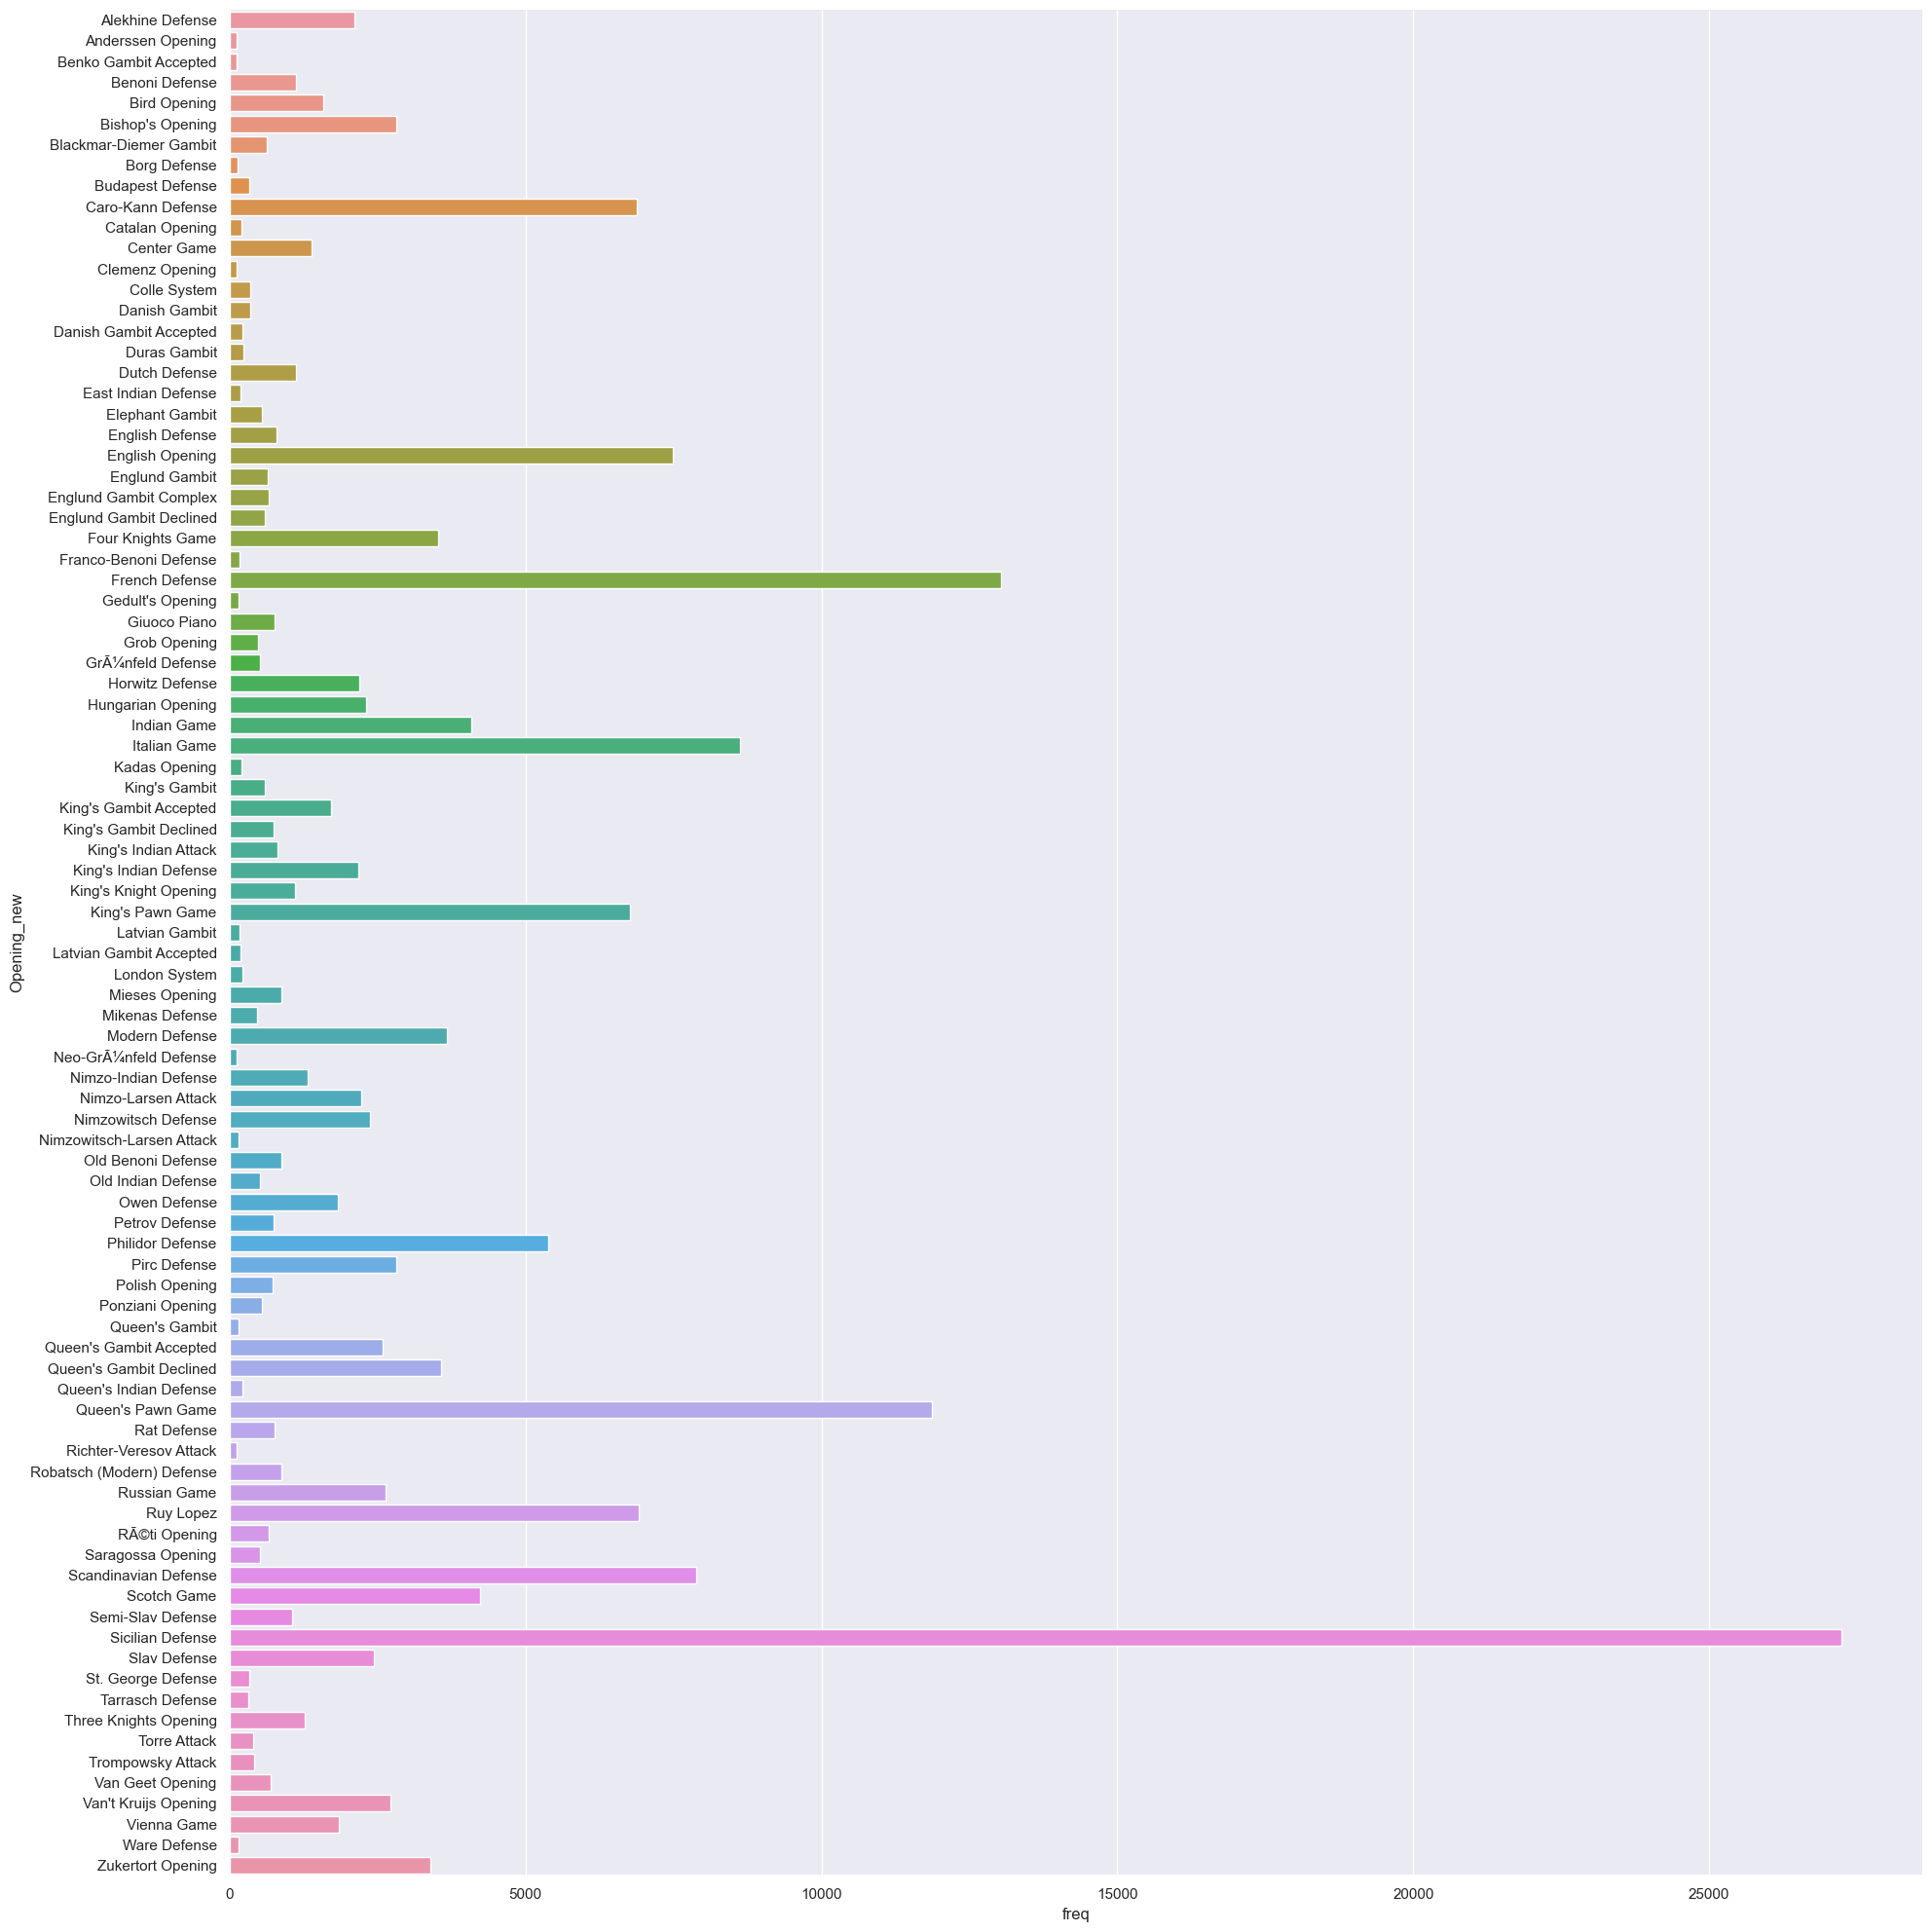

In [8]:
myorder=sorted(s['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = s, kind='bar',orient='h', height=20, aspect=1, order=myorder, ci=None)


In [9]:
#Remove irrevelant rows, like user name, date and time, etc
sexportdata=s.drop(['Site','Round','Date','UTCDate','UTCTime','White','Black','Index','Weekday'], axis=1)

In [ ]:

sexportdata.to_csv('CleanedChessdata.csv')